In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import sklearn
import re
import codecs
from tqdm import tqdm

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/sarcasm (1).csv")

In [ ]:
print(df.shape)
df.head()

(55328, 3)


,Unnamed: 0,headline,is_sarcastic
0,0,former versace store clerk sues over secret 'b...,0
1,1,the 'roseanne' revival catches up to our thorn...,0
2,2,mom starting to fear son's web series closest ...,1
3,3,"boehner just wants wife to listen, not come up...",1
4,4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.rename(columns = {'headline':'text', 'is_sarcastic':'target'}, inplace = True)

In [ ]:
df.head()

,Unnamed: 0,text,target
0,0,former versace store clerk sues over secret 'b...,0
1,1,the 'roseanne' revival catches up to our thorn...,0
2,2,mom starting to fear son's web series closest ...,1
3,3,"boehner just wants wife to listen, not come up...",1
4,4,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [ ]:
df.describe()

,target
count,55328.000000
mean,0.458321
std,0.498264
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_preprocess = df.copy()
sarc = df_preprocess.text.copy()

In [ ]:
sarc

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
55323         jews to celebrate rosh hashasha or something
55324    internal affairs investigator disappointed con...
55325    the most beautiful acceptance speech this week...
55326    mars probe destroyed by orbiting spielberg-gat...
55327                   dad clarifies this not a food stop
Name: text, Length: 55328, dtype: object

In [ ]:
def clean_text (text):
     text = text.lower ()
     text = re.sub (r"[^  sa-zA-Z0-9 @  []]", '', text) # Removes punctuation #removes character for bracket one item
     text = re.sub (r"w *  d +  w *", '', text) # Remove digits
     text = re.sub (' s {2,}', "", text) # Removes unnecessary spaces
     
     return text

In [ ]:
sarc_clean = []
for t in sarc:
    sarc_clean.append(clean_text(t))

In [ ]:
corpus = []
for text in sarc_clean:
    corpus.append(text.replace("'","").replace(",","").replace("[","").replace("]",""))

In [ ]:
corpus

['former versace store clerk sues over secret black code for minority shoppers',
 'the roseanne revival catches up to our thorny political mood for better and worse',
 'mom starting to fear sons web series closest thing she will have to grandchild',
 'boehner just wants wife to listen not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 'advancing the worlds women',
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 'fridays morning email: inside trumps presser for the ages',
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 'north korea praises trump and urges us voters to reject dull hillary',
 'actually cnns jeffrey lord has been indefensible for a while',
 'barcelona holds huge protest in support of refugees

In [ ]:
len(corpus)

55328

In [ ]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1): #tokens in reverse order
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [ ]:
sarc_tokens = tokenize(corpus)
sarc_tokens

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'over',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['starting',
  'fear',
  'sons',
  'series',
  'closest',
  'thing',
  'will',
  'have',
  'grandchild'],
 ['boehner',
  'just',
  'wants',
  'wife',
  'listen',
  'come',
  'with',
  'alternative',
  'debt',
  'reduction',
  'ideas'],
 ['rowling', 'wishes', 'snape', 'happy', 'birthday', 'most', 'magical'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'grown', 'meat'],
 ['this', 'will', 'send', 'your', 'kids', 'school', 'work', 'company'],
 ['snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages'],
 ['airline', 'passengers', 'tackle', 'rushes', 'cockpit', 'bomb', 'threat'],
 ['facebook', 'reportedly', 'working', 'healthcare', 'features', 'apps'],
 ['north

In [ ]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [ ]:
Sarc_filtered = removeSW(sarc_tokens)

In [ ]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v")) #verb parts of speech
        texts_lem.append(text_lem)
    
    return texts_lem

In [ ]:
Sarc_lem = lemma(Sarc_filtered)

In [ ]:
Sarc_lem[4]

['rowling', 'wish', 'snape', 'happy', 'birthday', 'magical']

In [ ]:
Sarc_ready = []
for sarcs in Sarc_lem:
    string = ' '
    string = string.join(sarcs)
    Sarc_ready.append(string)

In [ ]:
Sarc_ready

In [ ]:
df_preprocess['Sarcasm'] = Sarc_ready

In [ ]:
df_preprocess.head()

,text,target,Sarcasm
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sue secret black co...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood b...
2,mom starting to fear son's web series closest ...,1,start fear sons series closest thing grandchild
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,rowling wish snape happy birthday magical


In [ ]:
old_cols = df_preprocess.columns.values 
new_cols= ['Sarcasm', 'text', 'target']
df_preprocess = df_preprocess.reindex(columns=new_cols)

In [ ]:
import codecs   #Fastext
from tqdm import tqdm
embeddings_index = {}
f = codecs.open('/content/gdrive/MyDrive/wiki.simple.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

111052it [00:23, 4776.76it/s]

found 111052 word vectors


In [ ]:
EMBEDDING_DIM = 300
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_preprocess.Sarcasm)

word_index = tokenizer.word_index
vocabulary_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocabulary_size)

Vocabulary Size : 21164


In [ ]:
word_index.items()

dict_items([('trump', 1), ('make', 2), ('report', 3), ('time', 4), ('say', 5), ('year', 6), ('find', 7), ('take', 8), ('area', 9), ('woman', 10), ('donald', 11), ('like', 12), ('first', 13), ('people', 14), ('house', 15), ('get', 16), ('show', 17), ('life', 18), ('go', 19), ('back', 20), ('call', 21), ('look', 22), ('obama', 23), ('white', 24), ('give', 25), ('know', 26), ('still', 27), ('want', 28), ('think', 29), ('women', 30), ('work', 31), ('watch', 32), ('plan', 33), ('come', 34), ('state', 35), ('live', 36), ('school', 37), ('clinton', 38), ('love', 39), ('right', 40), ('need', 41), ('world', 42), ('tell', 43), ('years', 44), ('could', 45), ('family', 46), ('americans', 47), ('black', 48), ('kill', 49), ('change', 50), ('star', 51), ('study', 52), ('parent', 53), ('bill', 54), ('shoot', 55), ('american', 56), ('would', 57), ('last', 58), ('leave', 59), ('talk', 60), ('home', 61), ('best', 62), ('really', 63), ('police', 64), ('help', 65), ('break', 66), ('cant', 67), ('death', 68

In [ ]:
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13339999,  0.40020001,  0.52983999, ...,  0.22612   ,
         0.15928   ,  0.17563   ],
       [ 0.28080001, -0.021503  ,  0.50373   , ...,  0.14409   ,
         0.012317  , -0.25454   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0024635 , -0.13499001,  0.049224  , ..., -0.37211999,
        -0.070376  ,  0.20172   ]])

In [ ]:
MAX_SEQUENCE_LENGTH = 30

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocabulary_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import RNN

## CNN+Bi-LSTM
## GRU + BI-LSTM


In [ ]:
inputs = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")
x = embedding_layer(inputs)
x = SpatialDropout1D(0.2)(x)  
# Conv1D + LSTM (bidirectional)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
model_a = tf.keras.Model(inputs, outputs)

In [ ]:
model_a.compile(optimizer=Adam(0.0001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_preprocess['Sarcasm'], df_preprocess['target'], train_size = 0.6,test_size=0.4, random_state=8)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test, test_size=0.5, random_state=123)
print("Train Data size:", len(X_train))
print("Test Data size", len(X_test))
print("val Data size", len(X_val))

Train Data size: 33196
Test Data size 11066
val Data size 11066


In [ ]:
BATCH_SIZE = 1024
EPOCHS = 100

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test),
                       maxlen = MAX_SEQUENCE_LENGTH)
X_val = pad_sequences(tokenizer.texts_to_sequences(X_val),
                       maxlen = MAX_SEQUENCE_LENGTH)
print("Training X Shape:",X_train.shape)
print("Testing X Shape:",X_test.shape)
print("Val X Shape:",X_val.shape)

Training X Shape: (33196, 30)
Testing X Shape: (11066, 30)
Val X Shape: (11066, 30)


In [ ]:
es=EarlyStopping(monitor='val_loss',
                 mode='min',
                 verbose=1,
                 patience=5)
reduce_lr = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.02,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
history_a = model_a.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=[es, reduce_lr])

Epoch 1/100
33/33 [==============================] - 39s 989ms/step - loss: 0.6879 - accuracy: 0.5428 - val_loss: 0.6800 - val_accuracy: 0.5533 - lr: 1.0000e-04
Epoch 2/100
33/33 [==============================] - 32s 984ms/step - loss: 0.6638 - accuracy: 0.6153 - val_loss: 0.6333 - val_accuracy: 0.6640 - lr: 1.0000e-04
Epoch 3/100
33/33 [==============================] - 33s 995ms/step - loss: 0.6148 - accuracy: 0.6651 - val_loss: 0.5901 - val_accuracy: 0.6834 - lr: 1.0000e-04
Epoch 4/100
33/33 [==============================] - 32s 986ms/step - loss: 0.5894 - accuracy: 0.6857 - val_loss: 0.5665 - val_accuracy: 0.7012 - lr: 1.0000e-04
Epoch 5/100
33/33 [==============================] - 32s 984ms/step - loss: 0.5756 - accuracy: 0.6952 - val_loss: 0.5515 - val_accuracy: 0.7166 - lr: 1.0000e-04
Epoch 6/100
33/33 [==============================] - 33s 988ms/step - loss: 0.5634 - accuracy: 0.7075 - val_loss: 0.5424 - val_accuracy: 0.7230 - lr: 1.0000e-04
Epoch 7/100
33/33 [===============

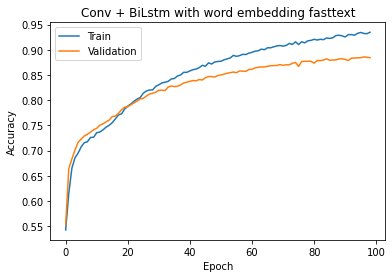

In [ ]:
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('Conv + BiLstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

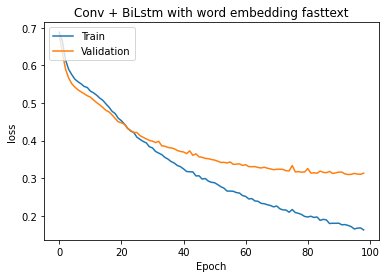

In [ ]:
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.ylabel('loss')
plt.title('Conv + BiLstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
score = model_a.evaluate(X_test, y_test, verbose = 0)

In [ ]:
y_pred = model_a.predict(X_test)

In [ ]:
print('Test loss:', score[0]*100,'%') 
print('Test accuracy:', score[1]*100,'%')

Test loss: 31.96689784526825 %
Test accuracy: 88.32460045814514 %


GRU + BI-LSTM

In [ ]:
IN = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(IN)
x = tf.keras.layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x)

x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)

OUT = Dense(1, activation="sigmoid")(x)

model_E = tf.keras.Model(IN, OUT)

In [ ]:
model_E.compile(optimizer=Adam(0.0001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_E = model_E.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val,y_val), callbacks=[es, reduce_lr])

Epoch 1/100
33/33 [==============================] - 46s 1s/step - loss: 0.6910 - accuracy: 0.5337 - val_loss: 0.6881 - val_accuracy: 0.5374 - lr: 1.0000e-04
Epoch 2/100
33/33 [==============================] - 37s 1s/step - loss: 0.6830 - accuracy: 0.5588 - val_loss: 0.6736 - val_accuracy: 0.6006 - lr: 1.0000e-04
Epoch 3/100
33/33 [==============================] - 37s 1s/step - loss: 0.6531 - accuracy: 0.6225 - val_loss: 0.6245 - val_accuracy: 0.6448 - lr: 1.0000e-04
Epoch 4/100
33/33 [==============================] - 37s 1s/step - loss: 0.6195 - accuracy: 0.6519 - val_loss: 0.6045 - val_accuracy: 0.6655 - lr: 1.0000e-04
Epoch 5/100
33/33 [==============================] - 37s 1s/step - loss: 0.6038 - accuracy: 0.6681 - val_loss: 0.5886 - val_accuracy: 0.6784 - lr: 1.0000e-04
Epoch 6/100
33/33 [==============================] - 37s 1s/step - loss: 0.5908 - accuracy: 0.6792 - val_loss: 0.5754 - val_accuracy: 0.6927 - lr: 1.0000e-04
Epoch 7/100
33/33 [==============================] -

In [ ]:
score3 = model_E.evaluate(X_test, y_test, verbose = 0) 
score3

[0.4203215539455414, 0.8060726523399353]

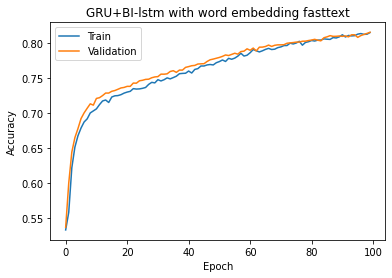

In [ ]:
plt.plot(history_E.history['accuracy'])
plt.plot(history_E.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('GRU+BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

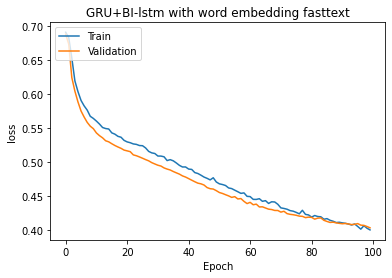

In [ ]:
plt.plot(history_E.history['loss'])
plt.plot(history_E.history['val_loss'])
plt.ylabel('loss')
plt.title('GRU+BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Glorot weight initialiser


In [ ]:
inner = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype="int32")

x = embedding_layer(inner)
x = SpatialDropout1D(0.2)(x)  

# Conv1D + LSTM (bidirectional)
x = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2))(x)

x = Dense(512, kernel_initializer = 'glorot_uniform',activation="relu")(x)
x = Dropout(0.5)(x)

outer = Dense(1, activation="sigmoid")(x)

model_F = tf.keras.Model(inner, outer)

In [ ]:
model_F.compile(optimizer=Adam(0.0001), loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_F = model_F.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(X_val, y_val), callbacks=[es, reduce_lr])

In [ ]:
score4 = model_F.evaluate(X_test, y_test, verbose = 0) 
score4

In [ ]:
plt.plot(history_F.history['accuracy'])
plt.plot(history_F.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.title('BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
plt.plot(history_F.history['loss'])
plt.plot(history_F.history['val_loss'])
plt.ylabel('loss')
plt.title('BI-lstm with word embedding fasttext')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')